# Comparing Two Population Variances

#### We know how to test for the equality of $\sigma^2 = \sigma^2_0$ for any $\sigma^2_0$. So, let's grab our test statistic for 

$$
H_0: \sigma^2 = \sigma^2_0
$$

Then let's say that we have samples of two populations 

$$
y_{11}, y_{21}, ... , y_{n_1, 1} \sim N(\mu_1, \sigma_1^{2})
$$

and

$$
y_{12}, y_{22}, ... , y_{n_2, 2} \sim N(\mu_2, \sigma_2^{2})
$$

Then for the first population and the null hypothesis $H_0: \sigma_1^2 = \sigma_0^2$:

$$
\frac{(n_1-1)S_1^2}{\sigma_0^2} \sim \chi^2_{df=n_1-1}
$$

and for the second population and same null hypothesis $H_0: \sigma_2^2 = \sigma_0^2$:
we get 

$$
\frac{(n_2-1)S_2^2}{\sigma_0^2} \sim \chi^2_{df=n_2-1}
$$

and thus we know the distributions of the two test statistics. We are essentially testing the null hypothesis 
$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_0^2$ then, right?

So, it would be nice to have a convenient form to test this, so let's divide the first test statistic by the second test statistic.

$$
\frac{\frac{(n_1-1)S_1^2}{\sigma_0^2}}{\frac{(n_2-1)S_2^2}{\sigma_0^2}} \sim \frac{\chi^2_{df=n_1-1}}{\chi^2_{df=n_2-1}}
$$

It's obvious that the $\sigma_0^2$ cancel, and thus we end up with 

$$
\frac{(n_1-1)S_1^2}{(n_2-1)S_2^2} \sim \frac{\chi^2_{df=n_1-1}}{\chi^2_{df=n_2-1}}
$$
and finally, a nice property is that we can divide the number of degrees of freedom over...

$$
\frac{S_1^2}{S_2^2} \sim \frac{\chi^2_{df=n_1-1}/(n_1-1)}{\chi^2_{df=n_2-1}/(n_2-1)}
$$


#### Question 1
$$
\frac{\chi^2_{df=n_1-1}/(n_1-1)}{\chi^2_{df=n_2-1}/(n_2-1)}
$$ 
That is, the ratio of two $\chi^2$ distributions divided by their corresponding degrees of freedom is called?


You can use var.test in R for the the test of the equality of the population variances.

#### Question 2:
A consumer-protection magazine was interested in comparing tires purchased from two different companies that each claimed their tires would last 40,000 miles. A random sample of 10 tires of each brand was obtained and tested under simulated road conditions. The number of miles until the tread thickness reached a specified depth was recorded for all tires. The data are given next (in 1,000 miles).

In [55]:
brand_I <-c(38.9, 39.7, 42.3, 39.5, 39.6, 35.6, 36.0, 39.2, 37.6, 39.5) 
brand_II <-c(44.6, 46.9, 48.7, 41.5, 37.5, 33.1, 43.4, 36.5, 32.5, 42.0)


1. Plot the data and compare the distributions of longevity for the two brands.

2. Construct 95% confidence intervals on the means and standard deviations for the number of miles until tread wearout occurred for both brands.

3. Does there appear to be a difference in wear characteristics for the two brands? Justify your statement with appropriate plots of the data, tests of hypotheses, and confidence intervals.

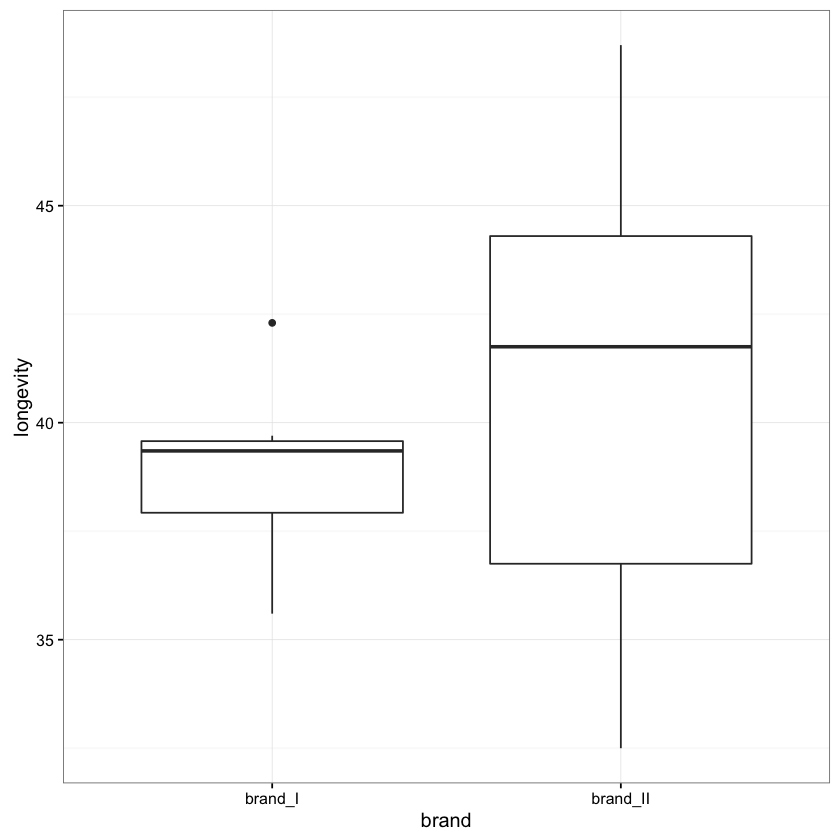

In [56]:
## you can ignore the following 
library(reshape2)
library(ggplot2)
brands <- data.frame(brand_I, brand_II)
brands <- melt(brands, measure.vars = c("brand_I","brand_II"))
colnames(brands)<-c("brand", "longevity")


ggplot(brands, aes(x=brand, y=longevity)) + geom_boxplot() + theme_bw()

In [57]:
confint_var_ratio <- function(var1, var2, alpha){
    if(var(var1)>var(var2)){
        ratio <- var(var1)/var(var2)
        F_l <- qf(alpha/2, df1=length(var1)-1, df2=length(var2)-1)
        F_u <- qf(1-alpha/2,df1=length(var1)-1, df2=length(var2)-1)
    }else{
        ratio <- var(var2)/var(var1)
        F_l <- qf(alpha/2, df1=length(var2)-1, df2=length(var1)-1)
        F_u <- qf(1-alpha/2,df1=length(var2)-1, df2=length(var1)-1)
       
    }
    
    confint <- matrix(c(ratio*F_l ,  ratio*F_u), ncol=2, nrow=1, byrow=T)
    colnames(confint) <- c("lower $F_l\\times \\frac{s^2_1}{s^2_2}$", "upper $F_U\\times\\frac{s^2_1}{s^2_2}$")   

    return(confint)
}

confint_means <- function(var1, var2, alpha){
    means <- c(mean(var1), mean(var2))
    sds <- c(sd(var1), sd(var2))
    ns <- c(length(var1), length(var2))
    s_p <- sqrt((sds[1]*(ns[1]-1)+sds[2]*(ns[2]-1))/(ns[1]+ns[2]-2))
    
    
}

In [58]:
confint_var_ratio(var1=brand_I, var2=brand_II, alpha=0.05)

lower $F_l\times \frac{s^2_1}{s^2_2}$,upper $F_U\times\frac{s^2_1}{s^2_2}$
2.024588,32.815794


#### Question 3:

The risk of an investment is measured in terms of the variance of the returns that could be observed. Random samples of 10 yearly returns were obtained from two different portfolios. The data are given next (in thousands of dollars).

In [59]:
portfolio_1<-c(130, 135, 135, 131, 129, 135, 126, 136, 127, 132) 
portfolio_2<-c(154, 144, 147, 150, 155, 153, 149, 139, 140, 141)


1. Does portfolio 2 appear to have a higher risk than portfolio 1?

2. Give a p-value for your test and place a confidence interval on the ratio of the standard deviations of the two portfolios.

3. Provide a justification that the required conditions have been met for the inference
procedures used in parts (a) and (b).

#### Question 4:

Sales from weight-reducing agents marketed in the United States represent sizable amounts of income for many of the companies that manufacture these products. Psychological as well as physical effects often contribute to how well a person responds to the recommended therapy. Consider a comparison of two weight-reducing agents, A and B. In particular, consider the length of time people remain on the therapy. A total of 26 overweight males, matched as closely as possible physically, were randomly divided into two groups. Those in group 1 received preparation A and those assigned to group 2 received preparation B. The data are given here (in days).

In [60]:
prep_a <- scan(text="42 47 12 17 26 27 28 26 34 19 20 27 34")
prep_b <- scan(text="35 38 35 36 37 35 29 37 31 31 30 33 44")

### Tests of > 2 Variances:

The Hartley $F_max$ test is not super useful for data with any departure from normality. When the data have any non-normality, one should use the Levene-Brown-Forsythe Test. 


#### $F_max$
$$
F = \frac{S^2_{max}}{S^2_{min}} \sim F_{df_1=n_{max}-1, df_2 =n_{min}-1}
$$

#### $Levene-Brown-Forsyth$
$$
W = \frac{(N-k)}{(k-1)}\frac{\sum_{i=1}^{k}N_i(Z_{i.} - Z_{..})^2}{\sum_{i=1}^{k}\sum_{j=1}^{N_i}(Z_{ij} - Z_{i.})^2}
$$

Where 

$$
Z_{ij} = |Y_{ij} - \bar{Y_{i.}}|
$$
in the levene test and 
$$

$$
Z_{ij} = |Y_{ij} - \hat{M_{i.}}|
$$
in the Brown-Forsyth

#### We are going to skip Levene's as there are more fun things coming up next!

In [61]:
## ---- This function does the levene-brown-forsythe test for homogeneity of variances.

lbf_test <- function(data, group_col, measure_var, alpha=0.05, type="levene"){
    require("plyr")
    ## -------------------------
    ## This function takes a melted data.frame as input
    ## -------------------------
    ## group_col is a string 
    ## of the name of the column 
    ## that corresponds to the grouping 
    ## factor that defines the groupings.
    ## or if it is a number if is 
    ## the number of the column
    ## --------------------------
    gc <- data[,group_col]
    
    N <- nrow(data)
    k <- length(levels(gc))
    ns <- ddply(data,group_col,nrow)
    Z <- numeric(N)
    
    
    means_ddply <- function(df, group_col, measure_var){
        means <- ddply(.data = df, group_col,.fun = function(xx){
            mean=mean(xx[,measure_var], na.rm=TRUE)
        })
        return(means)
    }
    
    medians_ddply <- function(df, group_col, measure_var){
        medians <- ddply(.data = df, group_col,.fun = function(xx){
            median=median(xx[,measure_var], na.rm=TRUE)
        })
        return(medians)
    }
    
    if(type == "levene"){
        means <- means_ddply(df=data, group_col=group_col, measure_var=measure_var)
        for(i in 1:k){
            rws <- gc %in% levels(gc)[i]
            Z[rws] <- abs(data[rws,measure_var] - means[i,2])
            }
        }
    
    if(type =="bf"){
        ## grab the medians
        medians<-medians_ddply(df=data,group_col=group_col,measure_var=measure_var)
        ## loop through and calculate the Z_ij's
        for(i in 1:k){
            rws <- gc %in% levels(gc)[i]
            Z[rws] <- abs(data[rws,measure_var] - medians[i,2])
        }
        
    }
    tmp_df <- data.frame(Z = Z, group_col = gc)
    means_Z<- ddply(tmp_df, .(group_col), summarize, mean(Z))
    z_gm <- mean(tmp_df$Z)
        
    numer <- sum(ns[,2]*(means_Z[,2] - z_gm)^2)

    denom<-0
    for(i in 1:k){
        rws <- gc %in% levels(gc)[i]
        denom <- denom + sum((tmp_df[rws,'Z']-means_Z[i,2])^2)
    }
    norm <- (N-k)/(k-1)
    
    W <- norm*(numer/denom)
    crit <- qf(1-alpha,k-1, N-k)
    pval <- 1-pf(W, k-1, N-k)
    res <- c(W, crit, pval)
    res <- matrix(res, ncol=3, byrow=T)
    colnames(res) <- c("Test Statistic", "Critical Value", "P-val")
    return(res)
}

#### ANOVA

Analysis of Variance is a general term for any modeling technique where the data analyst tries to break the variattion in a variable (response) into chunks (treatment, error) so that one can understand how a treatment effects said response.

#### A Word about "dot" notation.

Say a set of numbers has two indexes, $i,j$ such that $y_{ij}$ are distinct numbers. Then $\sum_{i}y_{ij} = y_{.j}$ and $\sum_{j}y_{ij} = y_{i.}$

#### One-way ANOVA Model

Let's say that a response variable $Y_{ij}$ is under study, and is randomly assigned to $t$ many treatments, then if 
$\epsilon_{ij} \sim N(0, \sigma^2)$, then 

$$
Y_{ij} = \mu + \tau_i + \epsilon_{ij}
$$

Is our one way ANOVA model.

In words, describe

#### 1. $Y_{ij}$
#### 2. $\mu$
#### 3. $\tau_i$
#### 4. $\epsilon_{ij}$

#### 5. If $i=1,2, 3, 4$ and $j=1,2,...,10$, how many treatments to we have? How many replications do we have?

#### 6. What is the null hypothesis for a one-way ANOVA model?


In R, we use the lm function to fit anova models. Let's work through the next example.

#### Because many HMOs either do not cover mental health costs or provide only minimal coverage, ministers and priests often need to provide counseling to per- sons suffering from mental illness. An interdenominational organization wanted to determine whether the clerics from different religions have different levels of awareness with respect to the causes of mental illness. Three random samples were drawn, one containing ten Methodist ministers, a second containing ten Catholic priests, and a third containing ten Pentecostal ministers. Each of the 30 clerics was then examined, using a standard written test, to measure his or her knowledge about causes of mental illness. Does there appear to be a significant difference in the mean test scores for the three religions?

## Don't get weird because of the religious angle, I got this example from a book.

In [62]:
data <- data.frame(matrix(scan(text="
1 62 62 37
2 60 62 31
3 60 24 15
4 25 24 15
5 24 22 14
6 23 20 14
7 20 19 14
8 13 10 5
9 12 8 3 
10 6 8 2
"), ncol=4, nrow=10, byrow=T))

colnames(data)<- c("cleric", "methodist", "catholic", "pentacostal")


In [63]:
data
library(reshape2) 

,cleric,methodist,catholic,pentacostal
1,1,62,62,37
2,2,60,62,31
3,3,60,24,15
4,4,25,24,15
5,5,24,22,14
6,6,23,20,14
7,7,20,19,14
8,8,13,10,5
9,9,12,8,3
10,10,6,8,2


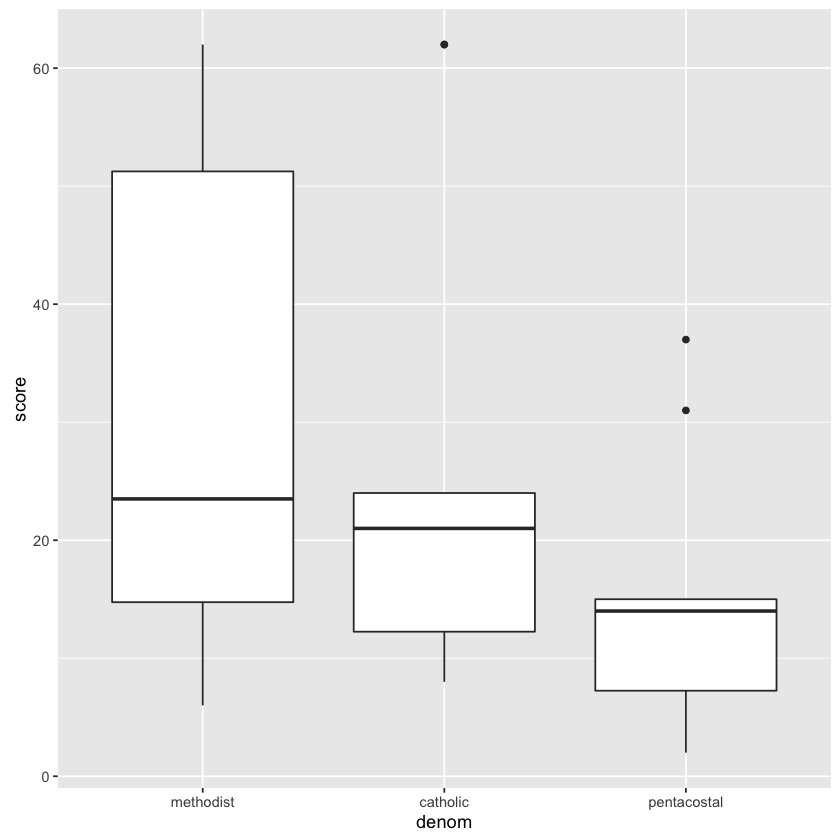

In [64]:
## Let's see if the assumptions for the ANOVA model hold.
## Just run the following code, no need to understand it.
## -----------------------------------------------------
## install.packages("reshape2") 
library(reshape2) 
library(ggplot2)
data_m <- melt(data, measure.vars = c("methodist", "catholic", "pentacostal"), id.vars = "cleric")
colnames(data_m) <- c("cleric","denom", "score")
ggplot(aes(x=denom, y=score), data=data_m) + geom_boxplot()

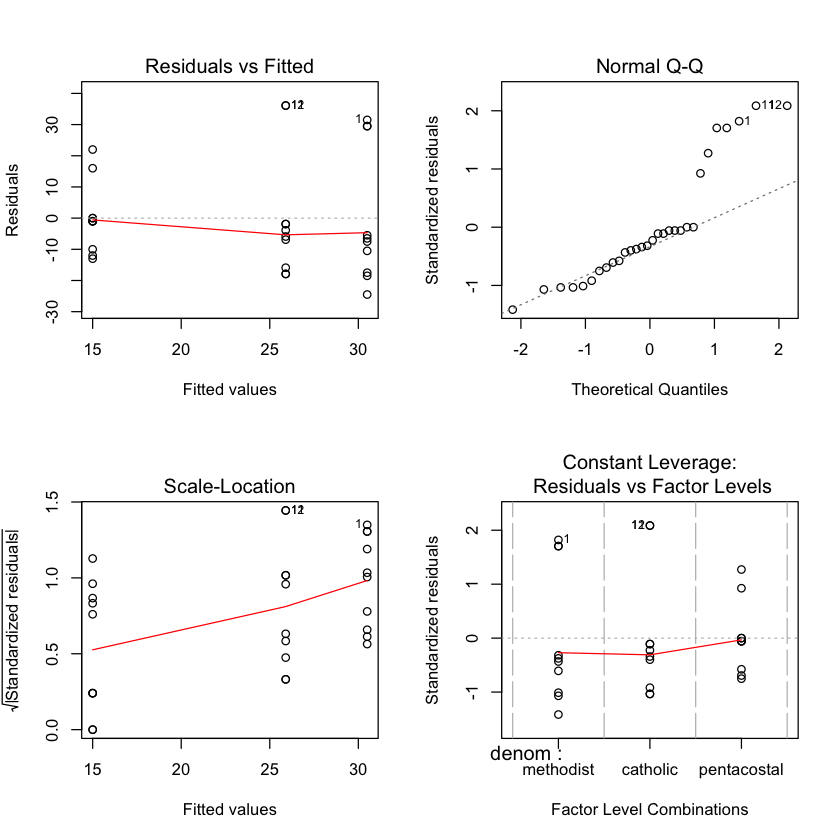

In [65]:
## let's calculate the residuals and see if they are normal
## Actually the fastest way to do this, is to just fit an ANOVA model.

anova_mod <- lm(score ~ denom, data=data_m)
par(mfrow=c(2,2))
plot(anova_mod)

#### Looking at the top right plot, do the residuals appear to be distributed normally?

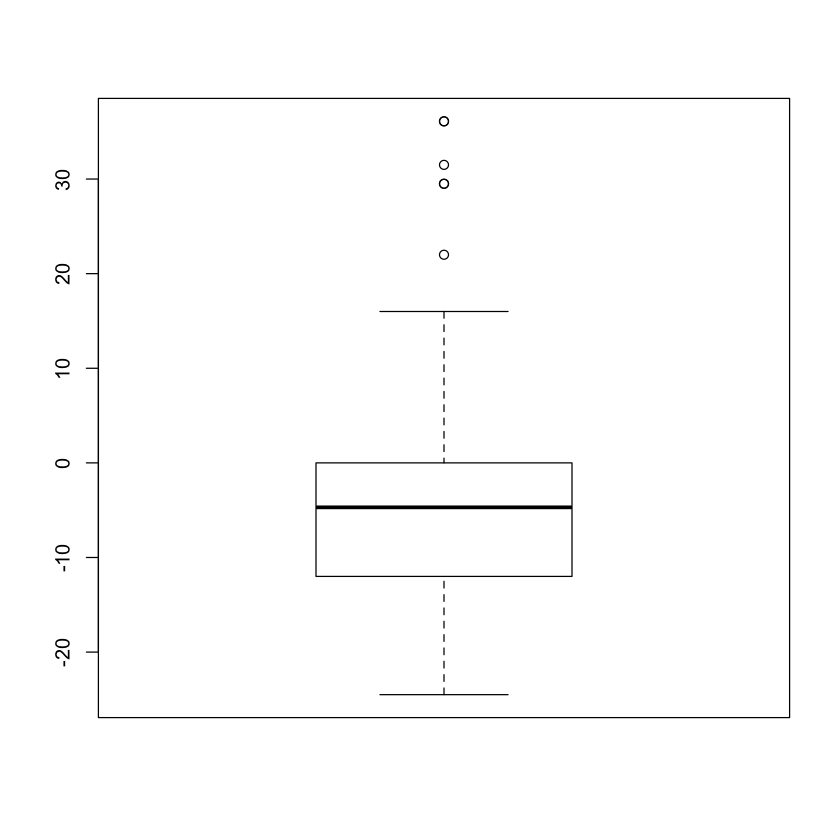

In [66]:
r <- residuals(anova_mod)
boxplot(r)

In [67]:
data_m <- cbind(data_m, r)

In [68]:
data_m ### r is the column of residuals for each cleric.

,cleric,denom,score,r
1,1,methodist,62,31.5
2,2,methodist,60,29.5
3,3,methodist,60,29.5
4,4,methodist,25,-5.5
5,5,methodist,24,-6.5
6,6,methodist,23,-7.5
7,7,methodist,20,-10.5
8,8,methodist,13,-17.5
9,9,methodist,12,-18.5
10,10,methodist,6,-24.5


### Using the results from the levene brown-forsyth test, are the variance of the residuals equal
### for each denomination?

In [69]:
lbf_test(data = data_m, group_col = 'denom', measure_var = 'r')

Test Statistic,Critical Value,P-val
2.52070425,3.35413083,0.09915263


In [70]:
summary(anova_mod) ## This is a summary of the anova model


Call:
lm(formula = score ~ denom, data = data_m)

Residuals:
   Min     1Q Median     3Q    Max 
-24.50 -11.62  -4.70   0.00  36.10 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        30.500      5.768   5.288 1.41e-05 ***
denomcatholic      -4.600      8.157  -0.564   0.5774    
denompentacostal  -15.500      8.157  -1.900   0.0681 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.24 on 27 degrees of freedom
Multiple R-squared:  0.1237,	Adjusted R-squared:  0.05875 
F-statistic: 1.905 on 2 and 27 DF,  p-value: 0.1683


#### Let's produce an ANOVA table. 
#### The residuals row is equivalent to the error row in ANOVA tables in the book.

In [71]:
anova(anova_mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
denom,2,1267.4,633.7,1.905037,0.1682902
Residuals,27,8981.4,332.6444,NA,NA


#### Researchers from the Department of Fruit Crops at a university compared four different preservatives to be used in freezing strawberries. The researchers prepared the yield from a straw- berry patch for freezing and randomly divided it into four equal groups. Within each group they treated the strawberries with the appropriate preservative and packaged them into eight small plas- tic bags for freezing at 0°C. The bags in group I served as a control group, while those in groups II, III, and IV were assigned one of three newly developed preservatives. After all 32 bags of straw- berries were prepared, they were stored at 0°C for a period of 6 months. At the end of this time, the contents of each bag were allowed to thaw and then rated on a scale of 1 to 10 points for discol- oration. (Note that a low score indicates little discoloration.) The ratings are given here:

In [72]:
data <- matrix(scan(text="
10 8 7.5 8 9.5 9 7.5 7 
6 7.5 8 7 6.5 6 5 5.5 
3 5.5 4 4.5 3 3.5 4 4.5 
2 1 2.5 3 4 3.5 2 2"),ncol=4, nrow=8, byrow=F)
data <- data.frame(data)
colnames(data)<-c("I", "II", "III", "IV")
data_m <- melt(data)
data_m

No id variables; using all as measure variables


,variable,value
1,I,10
2,I,8
3,I,7.5
4,I,8
5,I,9.5
6,I,9
7,I,7.5
8,I,7
9,II,6
10,II,7.5


#### a. Create plots of the residuals and a test of the homogeneity of variances to assess whether the conditions needed to use AOV techniques are satisfied with this data set.


#### b. Test whether there is a difference in the mean ratings using $\alpha=05$.

#### c. Place 95% confidence intervals on the mean ratings for each of the groups.